In [4]:
pip install yfinance --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pyfolio --quiet

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

**Predefine the proporties of our Data set**

In [ ]:
risky_assets = ["AAPL", "IBM", "MSFT", "AMZN"]
start_date = "2018-09-02"
end_date = "2022-09-02"
n_assets = len(risky_assets)

In [ ]:
prices_df1 = yf.download(risky_assets, start_date, end_date)

[*********************100%***********************]  4 of 4 completed


In [ ]:
prices_df1.head(2)

Adj Close                                          Close  \
                 AAPL        AMZN         IBM        MSFT       AAPL   
Date                                                                   
2018-09-04  55.001381  101.975502  114.454758  106.860054  57.090000   
2018-09-05  54.642506   99.740997  115.224747  103.779854  56.717499   

                                                     High              ...  \
                  AMZN         IBM        MSFT       AAPL        AMZN  ...   
Date                                                                   ...   
2018-09-04  101.975502  139.273422  111.709999  57.294998  102.525002  ...   
2018-09-05   99.740997  140.210327  108.489998  57.417500  102.018997  ...   

                   Low                   Open                          \
                   IBM        MSFT       AAPL        AMZN         IBM   
Date                                                                    
2018-09-04  138.441681  110.220001  57.102501  101.324997  139.560226   
2018-09-05  138.671127  108.099998  57.247501  101.905502  138.804977   

                           Volume                                
                  MSFT       AAPL       AMZN      IBM      MSFT  
Date                                                             
2018-09-04  110.849998  109560400  114422000  3479205  22634600  
2018-09-05  111.010002  133332000  164412000  3270319  32872400  

[2 rows x 24 columns]

In [ ]:
prices_df = yf.download(risky_assets, start_date, end_date, adjusted = True)

[*********************100%***********************]  4 of 4 completed


In [ ]:
prices_df.head(3)

Adj Close                                          Close  \
                 AAPL        AMZN         IBM        MSFT       AAPL   
Date                                                                   
2018-09-04  55.001385  101.975502  114.454788  106.860054  57.090000   
2018-09-05  54.642509   99.740997  115.224731  103.779846  56.717499   
2018-09-06  53.734493   97.915497  115.012596  104.019005  55.775002   

                                                     High              ...  \
                  AMZN         IBM        MSFT       AAPL        AMZN  ...   
Date                                                                   ...   
2018-09-04  101.975502  139.273422  111.709999  57.294998  102.525002  ...   
2018-09-05   99.740997  140.210327  108.489998  57.417500  102.018997  ...   
2018-09-06   97.915497  139.952194  108.739998  56.837502  100.375000  ...   

                   Low                   Open                          \
                   IBM        MSFT       AAPL        AMZN         IBM   
Date                                                                    
2018-09-04  138.441681  110.220001  57.102501  101.324997  139.560226   
2018-09-05  138.671127  108.099998  57.247501  101.905502  138.804977   
2018-09-06  139.139572  107.510002  56.557499  100.325500  140.420654   

                           Volume                                
                  MSFT       AAPL       AMZN      IBM      MSFT  
Date                                                             
2018-09-04  110.849998  109560400  114422000  3479205  22634600  
2018-09-05  111.010002  133332000  164412000  3270319  32872400  
2018-09-06  108.250000  137160000  149774000  4444245  23477600  

[3 rows x 24 columns]

In [ ]:
prices_df.tail(3)

Adj Close                                           Close  \
                  AAPL        AMZN         IBM        MSFT        AAPL   
Date                                                                     
2022-08-30  158.910004  128.729996  129.580002  262.970001  158.910004   
2022-08-31  157.220001  126.769997  128.449997  261.470001  157.220001   
2022-09-01  157.960007  127.820000  129.660004  260.399994  157.960007   

                                                      High              ...  \
                  AMZN         IBM        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-08-30  128.729996  129.580002  262.970001  162.559998  132.070007  ...   
2022-08-31  126.769997  128.449997  261.470001  160.580002  130.589996  ...   
2022-09-01  127.820000  129.660004  260.399994  158.419998  128.020004  ...   

                   Low                    Open                          \
                   IBM        MSFT        AAPL        AMZN         IBM   
Date                                                                     
2022-08-30  129.289993  260.660004  162.130005  131.250000  130.559998   
2022-08-31  128.399994  261.329987  160.309998  129.449997  129.919998   
2022-09-01  127.739998  255.410004  156.639999  126.000000  128.399994   

                          Volume                               
                  MSFT      AAPL      AMZN      IBM      MSFT  
Date                                                           
2022-08-30  266.670013  77906200  49203000  2407900  22767100  
2022-08-31  265.390015  87991100  53648700  3490400  24791800  
2022-09-01  258.869995  74229900  56636100  3396200  23263400  

[3 rows x 24 columns]

**Calculate the Daily Asset Returns of Individual Stocks**

In [ ]:
returns = prices_df["Adj Close"].pct_change().dropna()
returns.head(3)

,AAPL,AMZN,IBM,MSFT
Date,,,,
2018-09-05,-0.006525,-0.021912,0.006727,-0.028825
2018-09-06,-0.016617,-0.018302,-0.001841,0.002304
2018-09-07,-0.008068,-0.003186,-0.006421,-0.004874


**Define Weights**

In [ ]:
n_assets

4

In [ ]:
portfolio_weights = n_assets * [1/n_assets]

In [ ]:
portfolio_weights

[0.25, 0.25, 0.25, 0.25]

**Calculate Portfolio Return**

In [ ]:
portfolio_return = pd.Series(np.dot(portfolio_weights, returns.T), index = returns.index)

In [ ]:
portfolio_return

Date
2018-09-05   -0.012634
2018-09-06   -0.008614
2018-09-07   -0.005637
2018-09-10   -0.001981
2018-09-11    0.018221
                ...   
2022-08-26   -0.037681
2022-08-29   -0.008059
2022-08-30   -0.009399
2022-08-31   -0.010071
2022-09-01    0.004579
Length: 1006, dtype: float64

**Create the Tear Sheet of our Investment**

Start date,2018-09-05
End date,2022-09-01
Total months,47
,Backtest
Annual return,17.5%
Cumulative returns,90.1%
Annual volatility,27.0%
Sharpe ratio,0.73
Calmar ratio,0.61
Stability,0.90
Max drawdown,-28.7%


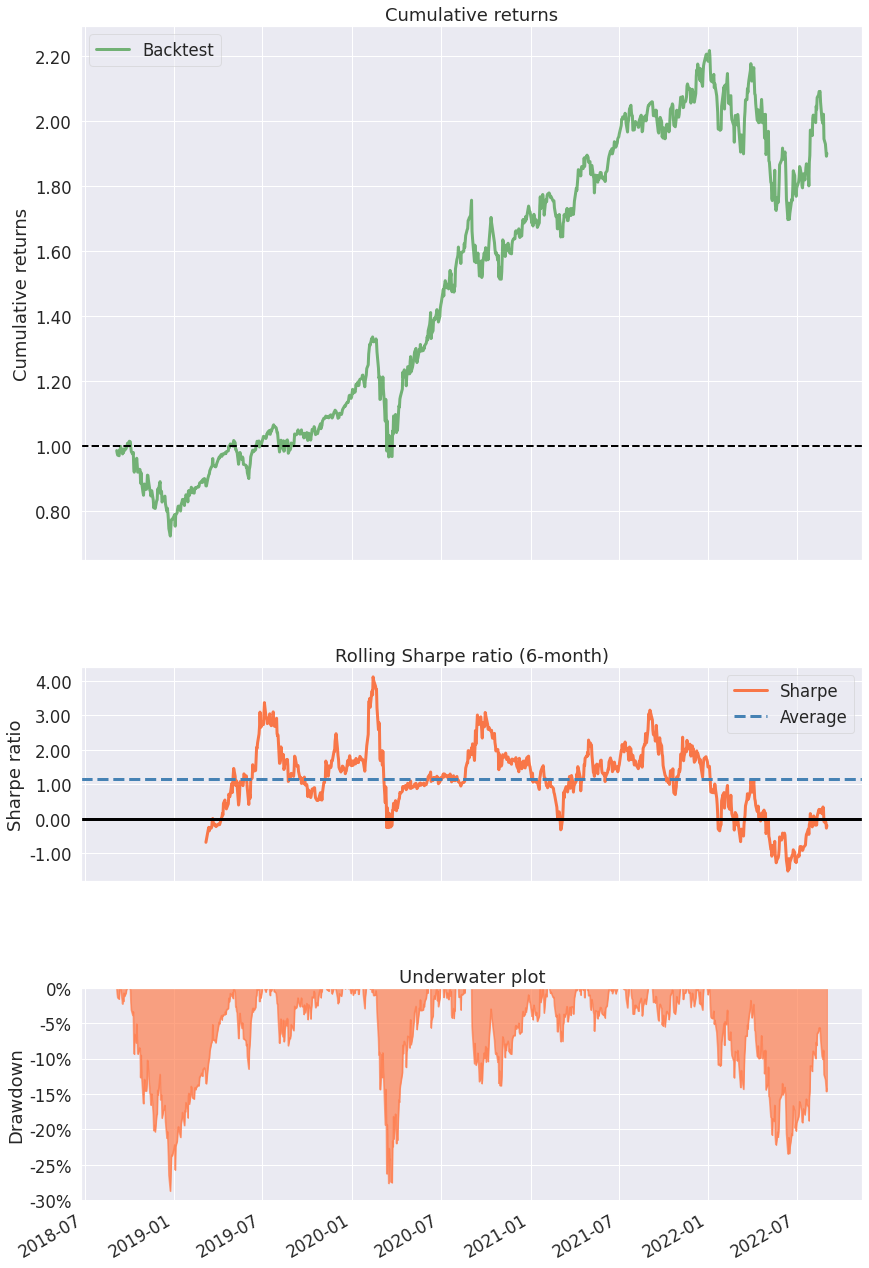

In [ ]:
pf.create_simple_tear_sheet(portfolio_return)

**Create Portfolio and Effecient Frontier using Random Simulation**

**Set up the Parameters**

In [ ]:
n_portfolios = 10**5
n_days = 252
risky_assets = ["AAPL", "IBM", "MSFT", "AMZN", "META"]
risky_assets.sort()
start_date = "2018-09-02"
end_date = "2022-09-02"
n_assets = len(risky_assets)

In [ ]:
prices_df = yf.download(risky_assets, start_date, end_date, adjusted = True)

[*********************100%***********************]  5 of 5 completed


In [ ]:
prices_df.head()

Adj Close                                                  \
                 AAPL        AMZN         IBM        META        MSFT   
Date                                                                    
2018-09-04  55.001377  101.975502  114.454788  171.160004  106.860054   
2018-09-05  54.642506   99.740997  115.224739  167.179993  103.779854   
2018-09-06  53.734489   97.915497  115.012619  162.529999  104.018990   
2018-09-07  53.300961   97.603500  114.274101  163.039993  103.512009   
2018-09-10  52.585617   96.950500  114.431213  164.179993  104.631226   

                Close                                                  ...  \
                 AAPL        AMZN         IBM        META        MSFT  ...   
Date                                                                   ...   
2018-09-04  57.090000  101.975502  139.273422  171.160004  111.709999  ...   
2018-09-05  56.717499   99.740997  140.210327  167.179993  108.489998  ...   
2018-09-06  55.775002   97.915497  139.952194  162.529999  108.739998  ...   
2018-09-07  55.325001   97.603500  139.053543  163.039993  108.209999  ...   
2018-09-10  54.582500   96.950500  139.244736  164.179993  109.379997  ...   

                 Open                                                  \
                 AAPL        AMZN         IBM        META        MSFT   
Date                                                                    
2018-09-04  57.102501  101.324997  139.560226  173.500000  110.849998   
2018-09-05  57.247501  101.905502  138.804977  169.490005  111.010002   
2018-09-06  56.557499  100.325500  140.420654  166.979996  108.250000   
2018-09-07  55.462502   96.935501  139.521988  160.309998  108.230003   
2018-09-10  55.237499   98.550003  140.152969  163.509995  108.839996   

               Volume                                          
                 AAPL       AMZN      IBM      META      MSFT  
Date                                                           
2018-09-04  109560400  114422000  3479205  29809000  22634600  
2018-09-05  133332000  164412000  3270319  31226700  32872400  
2018-09-06  137160000  149774000  4444245  41514800  23477600  
2018-09-07  150479200   97852000  4908983  24300600  22498600  
2018-09-10  158066000   90896000  3784742  20197700  20727900  

[5 rows x 30 columns]

**Calculate Daily and Anualized Return and STD**

In [ ]:
returns_df = prices_df["Adj Close"].pct_change().dropna()
avg_return = returns_df.mean()*n_days
cov_mat = returns_df.cov()*n_days

In [ ]:
avg_return

AAPL    0.323574
AMZN    0.121555
IBM     0.072613
META    0.079507
MSFT    0.272481
dtype: float64

In [ ]:
cov_mat

,AAPL,AMZN,IBM,META,MSFT
AAPL,0.118187,0.082468,0.044566,0.088708,0.084218
AMZN,0.082468,0.129913,0.033348,0.095464,0.080592
IBM,0.044566,0.033348,0.082193,0.034583,0.043796
META,0.088708,0.095464,0.034583,0.172988,0.083826
MSFT,0.084218,0.080592,0.043796,0.083826,0.098473


**Simulate the Portfolio with a random weight Allocation**

In [ ]:
np.random.seed(42)
weights = np.random.random(size = (n_portfolios, n_assets))
weights = weights/np.sum(weights, axis=1)[:, np.newaxis]

In [ ]:
weights 

array([[0.13319703, 0.33810082, 0.26031769, 0.21289984, 0.05548463],
       [0.06528492, 0.02430844, 0.36250145, 0.25157131, 0.29633388],
       [0.00928442, 0.43746759, 0.37546445, 0.09577331, 0.08201023],
       ...,
       [0.20159568, 0.1276073 , 0.23897949, 0.25821686, 0.17360066],
       [0.06162576, 0.23687072, 0.20328404, 0.22043154, 0.27778794],
       [0.19378302, 0.288101  , 0.14201812, 0.19362775, 0.18247011]])

**Developing the Portfolio**

In [ ]:
portf_rtns = np.dot(weights, avg_return)

portf_vol = []

for i in range (0, len(weights)):
  portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns/portf_vol

**Create a Data Frame to see the Result**

In [ ]:
portf_results_df = pd.DataFrame({"returns": portf_rtns, "volatility": portf_vol, "sharpe_ratio": portf_sharpe_ratio})
portf_results_df 

,returns,volatility,sharpe_ratio
0,0.135145,0.277798,0.486486
1,0.151149,0.265804,0.568647
2,0.113405,0.266859,0.424961
3,0.142966,0.270417,0.528687
4,0.208770,0.285648,0.730864
...,...,...,...
99995,0.173690,0.276536,0.628094
99996,0.118634,0.268261,0.442234
99997,0.165928,0.277660,0.597595
99998,0.156712,0.279383,0.560922


**Locating the points in Effecient Frontier**

In [ ]:
n_points = 200
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), n_points)

portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for print_index in range(n_points):
  if portf_rtns_ef[print_index] not in portf_rtns:
    indices_to_skip.append(print_index)
    continue
  matched_ind = np.where(portf_rtns == portf_rtns_ef[print_index])
  portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip )

**Plotting the Opportunity Set of the Portfolios**

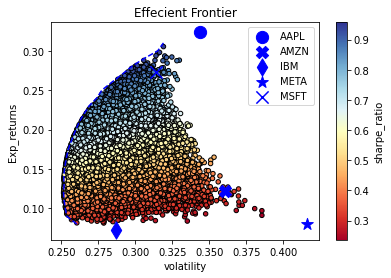

In [ ]:
marks = ["o", "X", "d", "*", "x"]

fig, ax = plt.subplots()

portf_results_df.plot(kind ="scatter", x = "volatility", y = "returns", c = "sharpe_ratio", cmap = "RdYlBu", edgecolors = "black", ax = ax)

ax.set(xlabel = "volatility", ylabel = "Exp_returns", title = "Effecient Frontier")

ax.plot(portf_vol_ef,portf_rtns_ef , "b--" )

for asset_index in range(n_assets):
  ax.scatter(x = np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
             y = avg_return[asset_index], marker = marks[asset_index], 
             s = 150, color = "blue", label = risky_assets[asset_index])

ax.legend()

**Finding out the Best Portfolio**

**Portfolio with Max Sharpe Ratio**

In [ ]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

In [ ]:
print("Max Sharpe Ratio Portfolio")
print("**************************")
print("Performance of the Portfolio")
print("****************************")

for index, value in max_sharpe_portf.items():
  print(f"{index}: {100*value:.3f}%  ", end = "", flush = True)

print("\nWEIGHT of the Optimum Portfolio")
print("*********************************")

for x, y in zip(risky_assets, weights[np.argmax(portf_results_df.sharpe_ratio)]):
  print(f"{x}: {100*y:.3f}%  ", end = "", flush = True)

Max Sharpe Ratio Portfolio
**************************
Performance of the Portfolio
****************************
returns: 30.532%  volatility: 31.898%  sharpe_ratio: 95.717%  
WEIGHT of the Optimum Portfolio
*********************************
AAPL: 73.648%  AMZN: 0.232%  IBM: 2.177%  META: 0.045%  MSFT: 23.898%  

In [ ]:
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [ ]:
print("Min Volatility Portfolio")
print("**************************")
print("Performance of the Portfolio")
print("****************************")

for index, value in min_vol_portf.items():
  print(f"{index}: {100*value:.3f}%  ", end = "", flush = True)

print("\nWEIGHT of the Optimum Portfolio")
print("*********************************")

for x, y in zip(risky_assets, weights[np.argmin(portf_results_df.volatility)]):
  print(f"{x}: {100*y:.3f}%  ", end = "", flush = True)

Min Volatility Portfolio
**************************
Performance of the Portfolio
****************************
returns: 11.953%  volatility: 25.152%  sharpe_ratio: 47.525%  
WEIGHT of the Optimum Portfolio
*********************************
AAPL: 3.341%  AMZN: 19.234%  IBM: 56.378%  META: 6.708%  MSFT: 14.338%  